<a href="https://colab.research.google.com/github/aahan-rd/ECON3916-Statistical-Machine-Learnin/blob/main/Econ_3916_Assignment_2_Audit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
normal_traffic = np.random.randint(20, 50, 980)
spike_traffic = np.random.randint(1000, 5000, 20)
latency_logs = np.concatenate([normal_traffic, spike_traffic])
def calculate_mad(data):
    median = np.median(data)
    deviations = np.abs(data - median)
    return np.median(deviations)

In [ ]:
mad_value = calculate_mad(latency_logs)
sd_value = np.std(latency_logs)
median_value = np.median(latency_logs)
mean_value = np.mean(latency_logs)
print("MAD vs SD")
print("No. of observations: " + str(len(latency_logs)))
print("Normal trafic: " + str(len(normal_traffic)))
print("Spike trafic: " + str(len(spike_traffic)))
print("Central Tendency:")
print("Mean: "+ str(mean_value) + " ms" )
print("Median: "+ str(median_value) + " ms" )
print("Dispersion Measures:")
print("Standard Deviation (SD): "+ str(sd_value) + " ms")
print("Median Abs Deviation (MAD): "+ str(mad_value) + " ms")
print("SD/MAD Ratio: "+ str(sd_value/mad_value))

MAD vs SD
No. of observations: 1000
Normal trafic: 980
Spike trafic: 20
Central Tendency:
Mean: 90.885 ms
Median: 35.0 ms
Dispersion Measures:
Standard Deviation (SD): 434.3704154002663 ms
Median Abs Deviation (MAD): 7.0 ms
SD/MAD Ratio: 62.052916485752334


In [12]:
def bayesian_audit(prior, sensitivity, specificity) :
  false_positive = 1 - specificity
  false_flagged = (sensitivity * prior) + (false_positive * (1 - prior))
  return (sensitivity * prior / false_flagged)


In [16]:
scen_a= bayesian_audit(0.50, 0.98, 0.98)
scen_b= bayesian_audit(0.05, 0.98, 0.98)
scen_c= bayesian_audit(0.001, 0.98, 0.98)
print("Scenario A: ",scen_a)
print("Scenario B: ",scen_b)
print("Scenario C: ",scen_c)

Scenario A:  0.98
Scenario B:  0.7205882352941175
Scenario C:  0.04675572519083965


In [21]:
total_users = 100000
control_users = 50,250
treatment_users = 49,750
obeserved = np.array([control_users, treatment_users])
expected = np.array([total_users/2,total_users/2])
def chi_square_test(observed, expected):
  chi_square = 0
  for i in range(len(observed)):
    chi_square = np.sum((observed - expected)**2 / expected)
  if chi_square > 3.84:
    print("Reject null hypothesis")
    return chi_square
  else:
    return chi_square
chi_square_test(obeserved, expected)

Reject null hypothesis


np.float64(197814.59802)

SURVIVORSHIP BIAS IN CRYPTO MARKETS

Total Tokens Launched: 10,000
Survivors (Top 1%): 100
Dead Projects: 9,900

Mean Market Cap (All Tokens): $4,765
Mean Market Cap (Survivors): $149,081

Bias Multiplier: 31.3x

If you only study survivors, you overestimate
   average success by 31.3x!


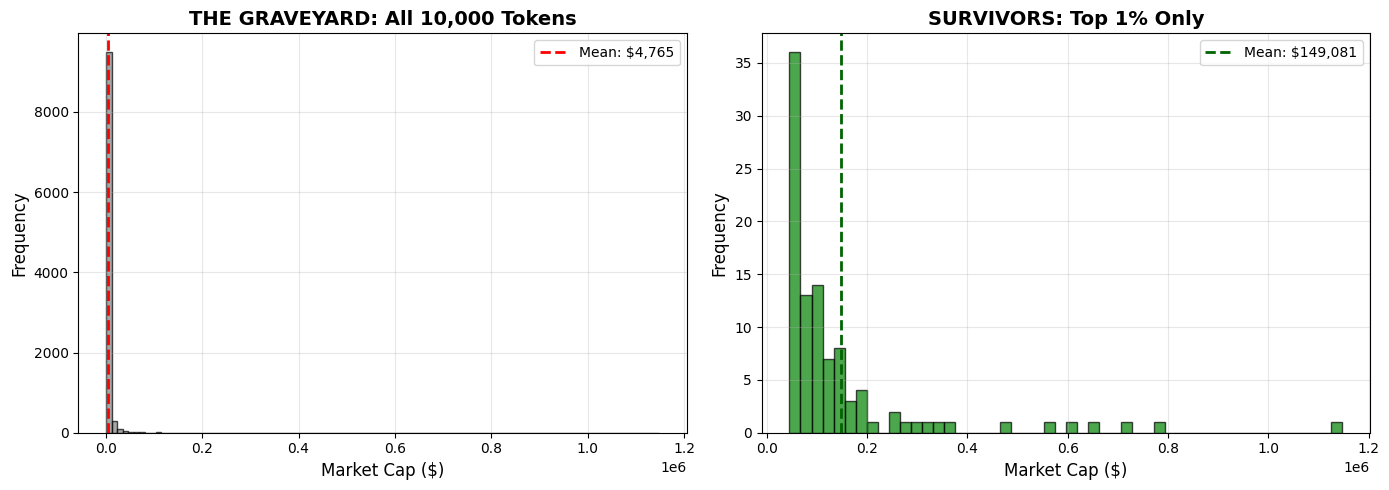


Market Cap Percentiles (All Tokens):
  50th percentile: $1,795
  90th percentile: $7,020
  95th percentile: $12,671
  99th percentile: $45,323
  99.9th percentile: $291,708


In [25]:

np.random.seed(42)

# Simulate 10,000 token launches with Pareto distribution (Power Law)
n_tokens = 10000
shape = 1.16  # Pareto shape parameter (lower = more extreme inequality)
market_caps = (np.random.pareto(shape, n_tokens) + 1) * 1000

# Create DataFrames
df_all = pd.DataFrame({'market_cap': market_caps})
threshold = np.percentile(market_caps, 99)
df_survivors = df_all[df_all['market_cap'] >= threshold].copy()

# Calculate means
mean_all = df_all['market_cap'].mean()
mean_survivors = df_survivors['market_cap'].mean()

# Print statistics

print("SURVIVORSHIP BIAS IN CRYPTO MARKETS")

print(f"\nTotal Tokens Launched: {n_tokens:,}")
print(f"Survivors (Top 1%): {len(df_survivors):,}")
print(f"Dead Projects: {len(df_all) - len(df_survivors):,}")
print(f"\nMean Market Cap (All Tokens): ${mean_all:,.0f}")
print(f"Mean Market Cap (Survivors): ${mean_survivors:,.0f}")
print(f"\nBias Multiplier: {mean_survivors/mean_all:.1f}x")
print(f"\nIf you only study survivors, you overestimate")
print(f"   average success by {mean_survivors/mean_all:.1f}x!")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Left: The Graveyard (all tokens)
ax1.hist(df_all['market_cap'], bins=100, color='gray', alpha=0.7, edgecolor='black')
ax1.axvline(mean_all, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_all:,.0f}')
ax1.set_xlabel('Market Cap ($)', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.set_title('THE GRAVEYARD: All 10,000 Tokens', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Right: Survivors only (top 1%)
ax2.hist(df_survivors['market_cap'], bins=50, color='green', alpha=0.7, edgecolor='black')
ax2.axvline(mean_survivors, color='darkgreen', linestyle='--', linewidth=2, label=f'Mean: ${mean_survivors:,.0f}')
ax2.set_xlabel('Market Cap ($)', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.set_title('SURVIVORS: Top 1% Only', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Additional insight: Percentiles
print("\nMarket Cap Percentiles (All Tokens):")
for p in [50, 90, 95, 99, 99.9]:
    val = np.percentile(market_caps, p)
    print(f"  {p}th percentile: ${val:,.0f}")